In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
from matplotlib import pylab
matplotlib.rcParams['figure.dpi'] = 80
params = {'legend.fontsize': 'large',
          'figure.figsize': (6, 4),
         'axes.labelsize': 'large',
         'axes.titlesize': 'large',
         'xtick.labelsize': 'large',
         'ytick.labelsize': 'large',
         'figure.facecolor': 'w'}
pylab.rcParams.update(params)

%load_ext autoreload
%autoreload 2
import emulator
import plotter
import utils

In [2]:
hod_names = ['M_sat', 'alpha', 'M_cut', 'sigma_logM', 'v_bc', 'v_bs', 'c_vir', 'f', 'f_env', 'delta_env', 'sigma_env']
hods_test = np.loadtxt('../tables/HOD_test_np11_n1000_new_f_env.dat')
hods_test[:, 0] = np.log10(hods_test[:, 0])
hods_test[:, 2] = np.log10(hods_test[:, 2])

cosmo_names = ['Omega_m', 'Omega_b', 'sigma_8', 'h', 'n_s', 'N_eff', 'w']
cosmos_test = np.loadtxt('../tables/cosmology_camb_test_box_full.dat')

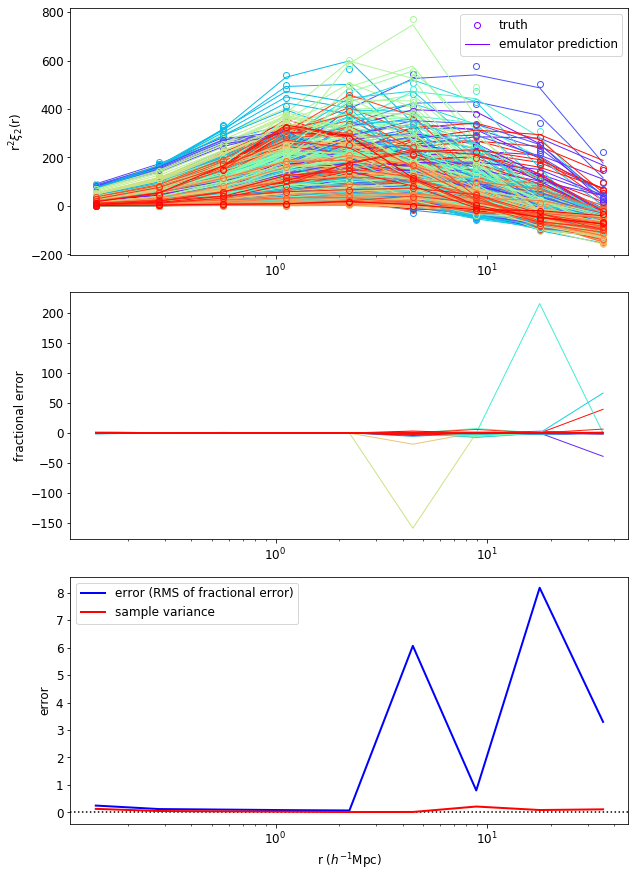

In [3]:
statistic='xi2'
traintag = '_nonolap'
testtag = '_mean_test0'
errtag = '_hod3_test0'
nhod = 100
kernel_name = 'M32ExpConst2'
savetag = ''

tag = '_mean_k{}_{}hod'.format(kernel_name, nhod)
gptag = traintag + errtag + tag
acctag = gptag + testtag + savetag
fracerrs = plotter.plot_accuracy(statistic, testtag, acctag, errtag, xrsq=True)

In [4]:
CC_test = range(0, 7)
HH_test = range(0, 100)
res_dir = '../../clust/results_{}/'.format(statistic)
err_dict = {}
for cosmo in CC_test:
    for hod in HH_test:
#for cosmo, hod in centrals:
        if "mean" in acctag:
            idtag = '{}_cosmo_{}_HOD_{}_mean'.format(statistic, cosmo, hod)
        else:
            idtag = '{}_cosmo_{}_Box_0_HOD_{}_test_0'.format(statistic, cosmo, hod)

        #TEST
        fnt = '{}testing_{}{}/{}.dat'.format(res_dir, statistic, testtag, idtag)
        rtest, ptest = np.loadtxt(fnt)

        # PREDICT
        fnp = '../testing_results/predictions_{}{}/{}.dat'.format(statistic, acctag, idtag)
        rpredic, ppredic = np.loadtxt(fnp, delimiter=',', unpack=True)

        fracerr = (ppredic-ptest)/ptest
        err_dict[(cosmo, hod)] = fracerr

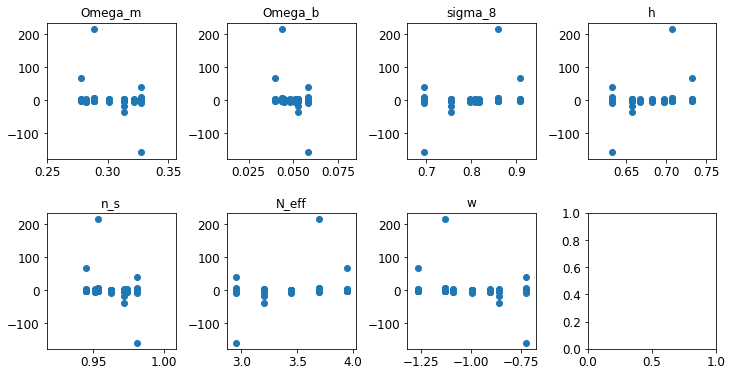

In [5]:
#for i in range(len(cosmo_names)):
cosmo_hl = 4
nrows = 2
ncols = 4
fig, axarr = plt.subplots(nrows=nrows, ncols=ncols, figsize=(3*ncols,3*nrows))
plt.subplots_adjust(hspace=0.4, wspace=0.4)
count = 0
for i in range(nrows):
    for j in range(ncols):
        ax = axarr[i][j]
        if count>=len(cosmo_names):
            break
        #vals = cosmos_train[:, count]
        title = cosmo_names[count]
        #val_hl = cosmos_test[cosmo_hl, count]
        
        ax.set_title(title)
        
        cs = []
        fs = []
        for key in err_dict: 
            c, h = key
            f = err_dict[key]
            cs.append(cosmos_test[c,count])
            fs.append(np.sum(f))
            
        ax.scatter(cs, fs)
        #ax.hist(vals, histtype='step')
        #ax.axvline(val_hl, color='magenta')
        count += 1

In [6]:
CC_test_central, HH_test_central = np.loadtxt('../tables/params_test_central.dat', unpack=True, dtype=int)

In [7]:
centrals = list(zip(CC_test_central, HH_test_central))
len(centrals)

95

95


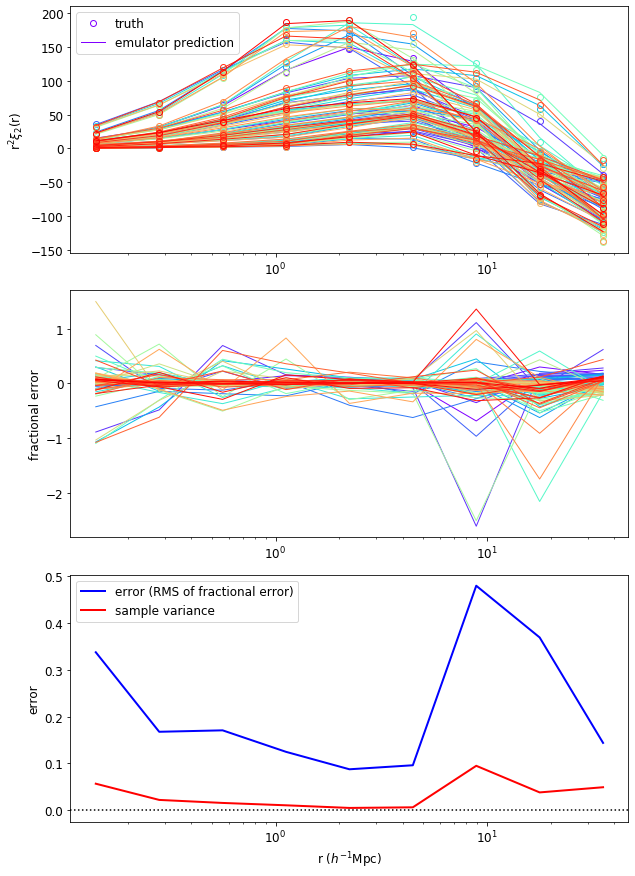

In [8]:
statistic='xi2'
traintag = '_nonolap'
testtag = '_mean_test0'
errtag = '_hod3_test0'
nhod = 100
kernel_name = 'M32ExpConst2'
savetag = ''

tag = '_mean_k{}_{}hod'.format(kernel_name, nhod)
gptag = traintag + errtag + tag
acctag = gptag + testtag + savetag
print(len(list(centrals)))
fracerrs = plotter.plot_accuracy_fromparams(statistic, testtag, acctag, errtag, centrals, xrsq=True)

In [9]:
CC_test = range(0, 7)
HH_test = range(0, 100)
res_dir = '../../clust/results_{}/'.format(statistic)
err_dict = {}
abserrs = []
fracerrs = []
ptests = []
for cosmo in CC_test:
    for hod in HH_test:
#for cosmo, hod in centrals:
        if "mean" in acctag:
            idtag = '{}_cosmo_{}_HOD_{}_mean'.format(statistic, cosmo, hod)
        else:
            idtag = '{}_cosmo_{}_Box_0_HOD_{}_test_0'.format(statistic, cosmo, hod)

        #TEST
        fnt = '{}testing_{}{}/{}.dat'.format(res_dir, statistic, testtag, idtag)
        rtest, ptest = np.loadtxt(fnt)

        # PREDICT
        fnp = '../testing_results/predictions_{}{}/{}.dat'.format(statistic, acctag, idtag)
        rpredic, ppredic = np.loadtxt(fnp, delimiter=',', unpack=True)

        ptests.append(ptest)
        
        fracerr = (ppredic-ptest)/ptest
        fracerrs.append(fracerr)
        err_dict[(cosmo, hod)] = fracerr
        
        abserr = ppredic-ptest
        abserrs.append(abserr)

Text(0, 0.5, '$(\\xi_{2,\\mathrm{pred}}-\\xi_{2})/\\xi_{2}$')

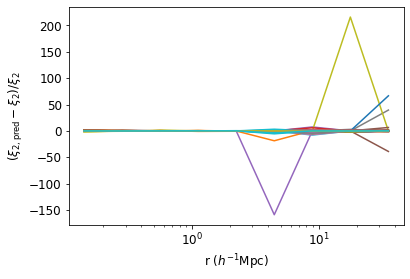

In [10]:
fracerrs = np.array(fracerrs)
plt.plot(rtest, fracerrs.T)
plt.xscale("log")
#plt.ylim(-3,3)
plt.xlabel(r'r ($h^{-1}$Mpc)')
plt.ylabel(r"$(\xi_{2,\mathrm{pred}}-\xi_{2})/\xi_{2}$")

Text(0, 0.5, '$(\\xi_{2,\\mathrm{pred}}-\\xi_{2})/\\xi_{2}$')

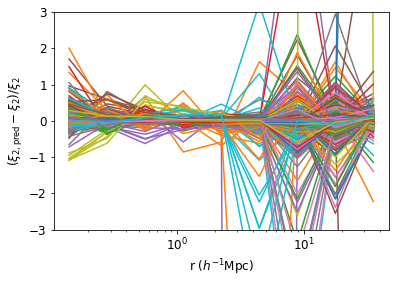

In [11]:
fracerrs = np.array(fracerrs)
plt.plot(rtest, fracerrs.T)
plt.xscale("log")
plt.ylim(-3,3)
plt.xlabel(r'r ($h^{-1}$Mpc)')
plt.ylabel(r"$(\xi_{2,\mathrm{pred}}-\xi_{2})/\xi_{2}$")

In [12]:
def normalize(arr):
    amin = np.min(arr)
    amax = np.max(arr)
    return (arr-amin)/(amax-amin)

[ 3.2468690e+02  1.8757540e+02  8.1399716e+01  3.0653608e+01
  9.3771722e+00  1.9734816e+00 -7.2541632e-02 -1.3897700e-01
 -4.7359732e-02]
0.0011283369999999997 7.3114078000000005


(array([481., 127.,  40.,  26.,  11.,   9.,   1.,   2.,   2.,   1.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

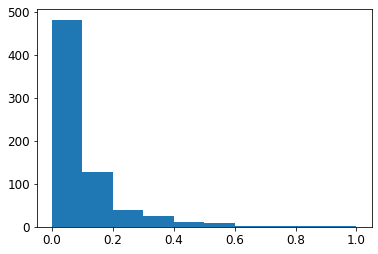

In [13]:
# psums = np.abs(np.sum(ptests, axis=1))
# print(min(psums), max(psums))
ptests = np.array(ptests)
print(ptests[0])
psums = np.abs(ptests[:,6])
print(min(psums), max(psums))
pnorms = normalize(psums)
plt.hist(pnorms)

Text(0, 0.5, '$xi_{2}$')

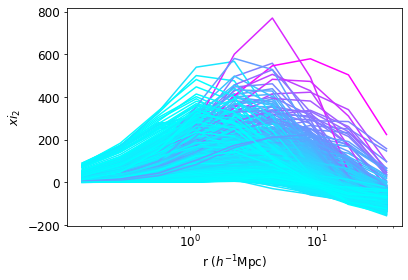

In [14]:
for i in range(len(fracerrs)):
    color=plt.cm.cool(pnorms[i])
    plt.plot(rtest, rtest**2 * ptests[i], color=color)
plt.xscale("log")
plt.xlabel(r'r ($h^{-1}$Mpc)')
plt.ylabel(r"$xi_{2}$")
#plt.yscale("log")

Text(0, 0.5, '$(\\xi_{2,\\mathrm{pred}}-\\xi_{2})/\\xi_{2}$')

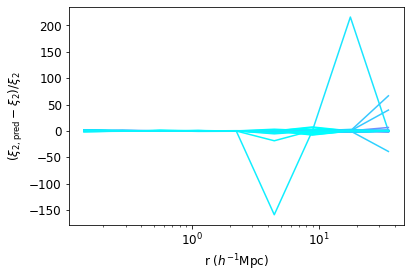

In [15]:
for i in range(len(fracerrs)):
    color=plt.cm.cool(pnorms[i])
    plt.plot(rtest, fracerrs[i], color=color)
plt.xscale("log")
plt.xlabel(r'r ($h^{-1}$Mpc)')
plt.ylabel(r"$(\xi_{2,\mathrm{pred}}-\xi_{2})/\xi_{2}$")

Text(0, 0.5, '$(\\xi_{2,\\mathrm{pred}}-\\xi_{2})/\\xi_{2}$')

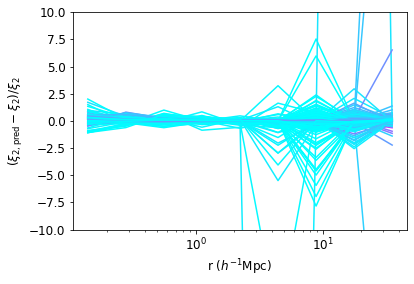

In [16]:
for i in range(len(fracerrs)):
    color=plt.cm.cool(pnorms[i])
    plt.plot(rtest, fracerrs[i], color=color)
plt.ylim(-10,10)
plt.xscale("log")
plt.xlabel(r'r ($h^{-1}$Mpc)')
plt.ylabel(r"$(\xi_{2,\mathrm{pred}}-\xi_{2})/\xi_{2}$")

Text(0, 0.5, '$\\xi_{2,\\mathrm{pred}} - \\xi_{2}$')

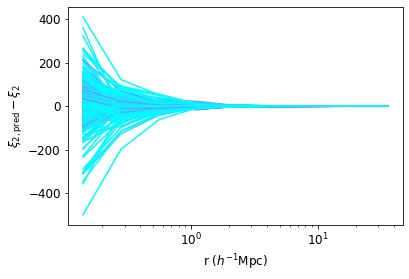

In [17]:
for i in range(len(fracerrs)):
    color=plt.cm.cool(pnorms[i])
    plt.plot(rtest, abserrs[i], color=color)
plt.xscale("log")
plt.xlabel(r'r ($h^{-1}$Mpc)')
plt.ylabel(r"$\xi_{2,\mathrm{pred}} - \xi_{2}$")

Text(0, 0.5, '$(\\xi_{2,\\mathrm{pred}} - \\xi_{2})/\\sigma$')

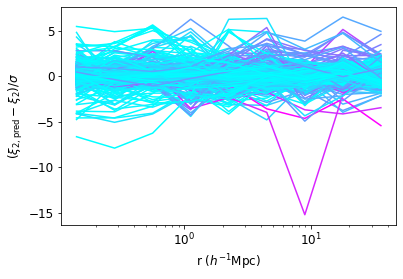

In [18]:
astd = np.std(abserrs, axis=0)
for i in range(len(fracerrs)):
    color=plt.cm.cool(pnorms[i])
    plt.plot(rtest, (abserrs/astd)[i], color=color)
plt.xscale("log")
plt.xlabel(r'r ($h^{-1}$Mpc)')
plt.ylabel(r"$(\xi_{2,\mathrm{pred}} - \xi_{2})/\sigma$")

# Compare errors

In [55]:
def get_errors(statistic, res_dir, testtag, CC_test, HH_test, boxes=None):
    assert "mean" in acctag or boxes is not None, "need either mean or boxes!"
    err_dict = {}
    abserrs = []
    fracerrs = []
    ptests = []
    for cosmo in CC_test:
        for hod in HH_test:
            idtags = []
            meantag = '{}_cosmo_{}_HOD_{}_mean'.format(statistic, cosmo, hod)
            if "mean" in testtag:
                idtags.append(meantag)
            else:
                for box in boxes:
                    idtags.append('{}_cosmo_{}_Box_{}_HOD_{}_test_0'.format(statistic, cosmo, box, hod))
                    
            for idtag in idtags:
                #TEST
                fnt = '{}testing_{}{}/{}.dat'.format(res_dir, statistic, testtag, idtag)
                try:
                    rtest, ptest = np.loadtxt(fnt)#, delimiter=',', unpack=True)
                except:
                    rtest, ptest = np.loadtxt(fnt, delimiter=',', unpack=True)
                # PREDICT
                fnp = '../testing_results/predictions_{}{}/{}.dat'.format(statistic, acctag, meantag)
                rpredic, ppredic = np.loadtxt(fnp, delimiter=',', unpack=True)

                ptests.append(ptest)

                fracerr = (ppredic-ptest)/ptest
                fracerrs.append(fracerr)
                err_dict[(cosmo, hod)] = fracerr

                abserr = ppredic-ptest
                abserrs.append(abserr)
    return rtest, fracerrs, abserrs, err_dict

### xi

In [85]:
statistic = 'xi'
traintag = '_nonolap'
errtag = '_hod3_test0'
nhod = 100
kernel_name = 'M32ExpConst2'
savetag = ''

tag = '_log_k{}_{}hod'.format(kernel_name, nhod)
gptag = traintag + errtag + tag
acctesttag = '_mean_test0'
acctag = gptag + acctesttag + savetag

res_dir = '../../clust/results_{}/'.format(statistic)
CC_test = range(0, 7)
HH_test = range(0, 100)

# mean
testtag = '_mean_test0'
rtest, fracerrs_mean, _, _ = get_errors(statistic, res_dir, testtag, CC_test, HH_test, boxes=None)

# each of 5
testtag = ''
boxes = range(0, 5)
rtest, fracerrs_5boxes, _, _ = get_errors(statistic, res_dir, testtag, CC_test, HH_test, boxes=boxes)

# 5 individual
testtag = ''
boxes = range(0, 5)
fracerrs_boxis = []
for box in boxes:
    boxes = [box]
    
    rtest, fracerrs_boxi, _, _ = get_errors(statistic, res_dir, testtag, CC_test, HH_test, boxes=boxes)
    fracerrs_boxis.append(fracerrs_boxi)

In [86]:
std_mean = np.std(fracerrs_mean, axis=0)
std_5boxes = np.std(fracerrs_5boxes, axis=0)
std_boxis = []
for fracerrs_boxi in fracerrs_boxis:
    std_boxis.append(np.std(fracerrs_boxi, axis=0))

In [87]:
cov_dir = "../../clust/covariances/"
stat_str = statistic
err_str = errtag
cov_aem = np.loadtxt(cov_dir+"cov_aemulus_{}{}{}.dat".format(stat_str, err_str, savetag))
err_1box = np.sqrt(np.diag(cov_aem))
err_5box = np.sqrt(1./5.)*err_1box
#gpp16 = np.loadtxt(cov_dir+"p16_aemulus_{}{}{}.dat".format(stat_str, err_str, savetag))
#gpp84 = np.loadtxt(cov_dir+"p84_aemulus_{}{}{}.dat".format(stat_str, err_str, savetag))

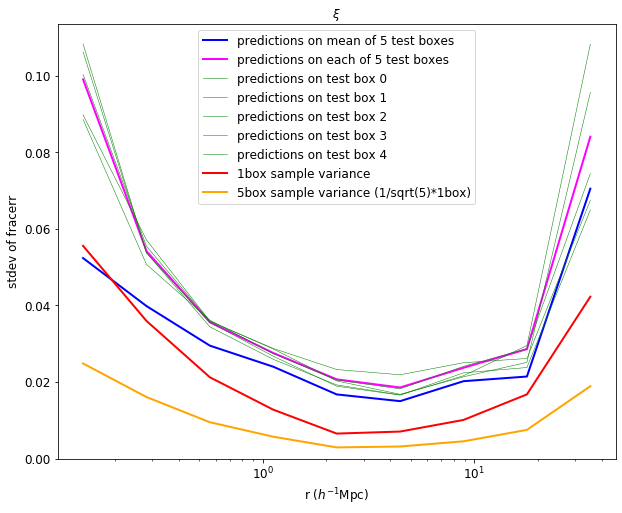

In [88]:
plt.figure(figsize=(10,8))
plt.plot(rtest, std_mean, label="predictions on mean of 5 test boxes", color='blue', lw=2)
plt.plot(rtest, std_5boxes, label="predictions on each of 5 test boxes", color='magenta', lw=2)
for i,std_boxi in enumerate(std_boxis):
    plt.plot(rtest, std_boxi, label=f"predictions on test box {i}", color='green', lw=0.5)
    
plt.plot(rtest, err_1box, label="1box sample variance", color='red', lw=2)
plt.plot(rtest, err_5box, label="5box sample variance (1/sqrt(5)*1box)", color='orange', lw=2)    
    
plt.title(r"$\xi$")
plt.xscale("log")
plt.xlabel(r'r ($h^{-1}$Mpc)')
plt.ylabel(r"stdev of fracerr")
plt.ylim(0)
plt.legend()

In [89]:
statistic = 'wp'
traintag = '_nonolap'
errtag = '_hod3_test0'
nhod = 100
kernel_name = 'M32ExpConst2'
savetag = ''

tag = '_log_k{}_{}hod'.format(kernel_name, nhod)
gptag = traintag + errtag + tag
acctesttag = '_mean_test0'
acctag = gptag + acctesttag + savetag

res_dir = '../../clust/results_{}/'.format(statistic)
CC_test = range(0, 7)
HH_test = range(0, 100)

# mean
testtag = '_mean_test0'
rtest, fracerrs_mean, _, _ = get_errors(statistic, res_dir, testtag, CC_test, HH_test, boxes=None)

# each of 5
testtag = ''
boxes = range(0, 5)
rtest, fracerrs_5boxes, _, _ = get_errors(statistic, res_dir, testtag, CC_test, HH_test, boxes=boxes)

# 5 individual
testtag = ''
boxes = range(0, 5)
fracerrs_boxis = []
for box in boxes:
    boxes = [box]
    
    rtest, fracerrs_boxi, _, _ = get_errors(statistic, res_dir, testtag, CC_test, HH_test, boxes=boxes)
    fracerrs_boxis.append(fracerrs_boxi)

In [90]:
std_mean = np.std(fracerrs_mean, axis=0)
std_5boxes = np.std(fracerrs_5boxes, axis=0)
std_boxis = []
for fracerrs_boxi in fracerrs_boxis:
    std_boxis.append(np.std(fracerrs_boxi, axis=0))

In [91]:
cov_dir = "../../clust/covariances/"
stat_str = statistic
err_str = errtag
cov_aem = np.loadtxt(cov_dir+"cov_aemulus_{}{}{}.dat".format(stat_str, err_str, savetag))
err_1box = np.sqrt(np.diag(cov_aem))
err_5box = np.sqrt(1./5.)*err_1box
#gpp16 = np.loadtxt(cov_dir+"p16_aemulus_{}{}{}.dat".format(stat_str, err_str, savetag))
#gpp84 = np.loadtxt(cov_dir+"p84_aemulus_{}{}{}.dat".format(stat_str, err_str, savetag))

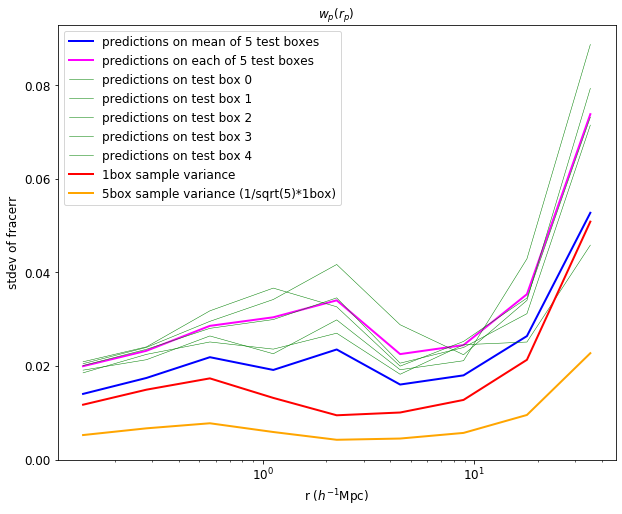

In [93]:
plt.figure(figsize=(10,8))
plt.plot(rtest, std_mean, label="predictions on mean of 5 test boxes", color='blue', lw=2)
plt.plot(rtest, std_5boxes, label="predictions on each of 5 test boxes", color='magenta', lw=2)
for i,std_boxi in enumerate(std_boxis):
    plt.plot(rtest, std_boxi, label=f"predictions on test box {i}", color='green', lw=0.5)
    
plt.plot(rtest, err_1box, label="1box sample variance", color='red', lw=2)
plt.plot(rtest, err_5box, label="5box sample variance (1/sqrt(5)*1box)", color='orange', lw=2)    
    
plt.title(r"$w_p(r_p)$")
plt.xscale("log")
plt.xlabel(r'r ($h^{-1}$Mpc)')
plt.ylabel(r"stdev of fracerr")
plt.ylim(0)
plt.legend()